In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the dataset

url = '/content/Mall_Customers.csv'
data = pd.read_csv(url)

#displaying few rows of the dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#summary of the numerical features
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#data types of each feature
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
#checking for missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#checking the unique values
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
#checking the unique values
data['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

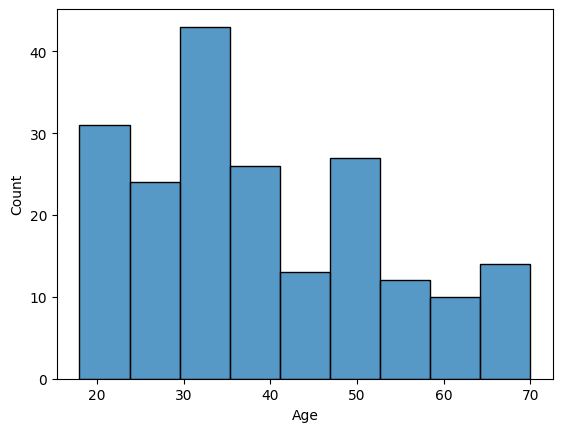

In [ ]:
#histogram
sns.histplot(data['Age'])
plt.show()

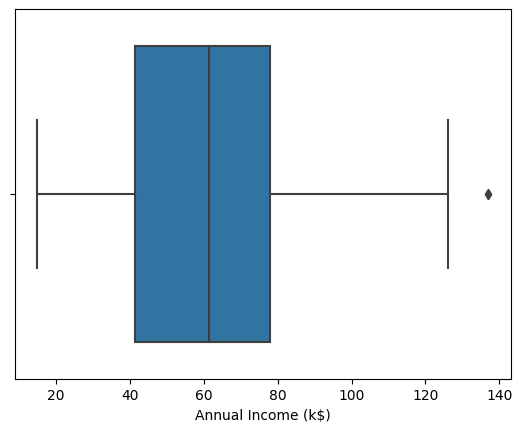

In [ ]:
# Boxplot
sns.boxplot(x=data['Annual Income (k$)'])
plt.show()

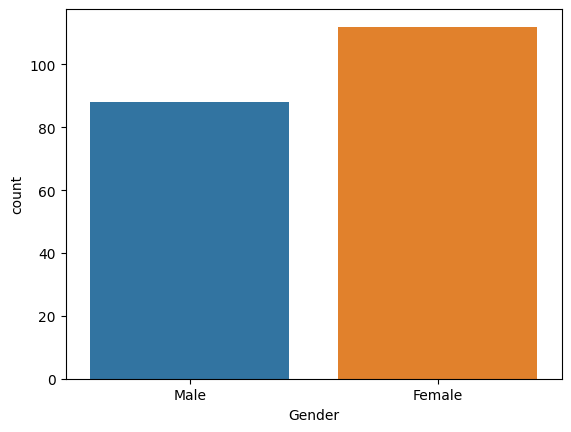

In [ ]:
# Count plot
sns.countplot(x=data['Gender'])
plt.show()

In [ ]:
# Encoding the 'Gender' column to convert it into numerical values
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

In [ ]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Creating an instance of the StandardScaler
scaler = StandardScaler()

# Scaling the 'Age' and 'Annual Income (k$)' features
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


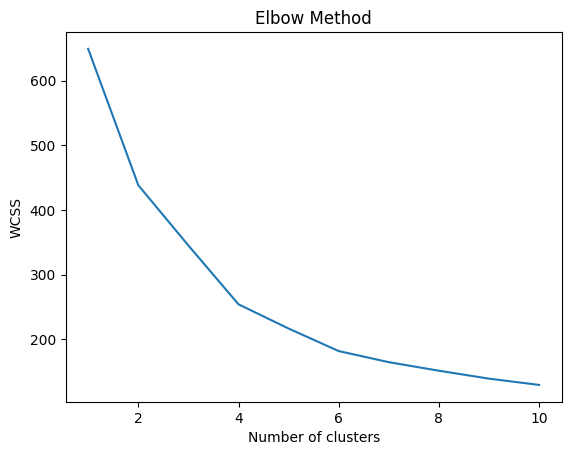

In [21]:
from sklearn.cluster import KMeans

# Selecting features to use for clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]

# Finding the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying kmeans to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Adding the cluster labels to the original data
data['Cluster'] = y_kmeans


In [22]:
# Analyzing the clusters
cluster_analysis = data.groupby('Cluster').mean()
cluster_analysis['Count'] = data['Cluster'].value_counts()
cluster_analysis


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Count
Cluster,,,,,,
0,75.723404,-0.781722,-0.403069,-0.215914,0.340426,47
1,164.529412,0.173295,1.066454,-1.298010,0.588235,34
2,71.051724,1.198627,-0.460981,-0.327038,0.431034,58
3,162.000000,-0.441917,0.991583,1.239503,0.461538,39
4,23.090909,-0.974396,-1.329545,1.132178,0.409091,22


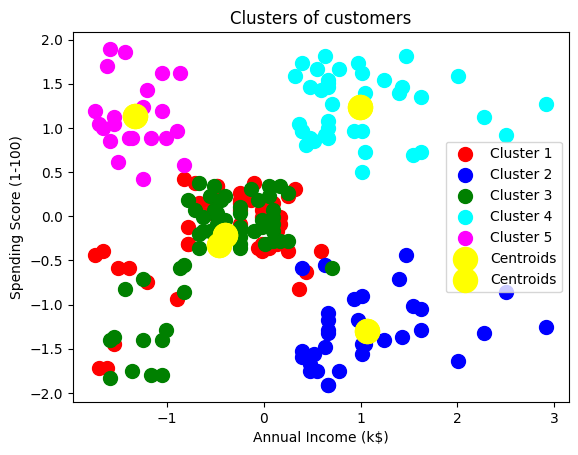

In [23]:
# Visualizing the clusters
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [24]:
from sklearn.metrics import silhouette_score

# Calculating the Silhouette Score
sil_score = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.34977050035201074
